# DM2022 ISA5810 Lab2 Homework Competition - Bert - with - emoji

## Install Packages

In [1]:
!pip install -q transformers
!pip install -q datasets

In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


In [3]:
!pip3 install seaborn

In [4]:
!pip3 install -U scikit-learn

In [29]:
!pip3 install emoji --upgrade

     |████████████████████████████████| 240 kB 1.5 MB/s            
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for emoji, since package 'wheel' is not installed.
    Running setup.py install for emoji ... done


In [48]:
!pip3 install nltk

     |████████████████████████████████| 1.5 MB 1.4 MB/s            


In [58]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/allenyl/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
!pip install spacymoji

     |████████████████████████████████| 6.4 MB 159 kB/s            
     |████████████████████████████████| 51 kB 3.4 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 181 kB 11.2 MB/s            
     |████████████████████████████████| 809 kB 11.0 MB/s            
     |████████████████████████████████| 127 kB 11.0 MB/s            
     |████████████████████████████████| 11.2 MB 61 kB/s              
     |████████████████████████████████| 46 kB 2.2 MB/s             
     |████████████████████████████████| 489 kB 10.9 MB/s            
     |████████████████████████████████| 58 kB 3.1 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 10.2 MB 12 kB/s              
     |████████████████████████████████| 116 kB 11.2 MB/s            
Using legacy 'setup.py install' for emoji, since package 'wheel' is not installed.
Using legacy 'setup.py install' for contextvars, since package 'wheel' is not 

In [42]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
!pip3 install -U imbalanced-learn

     |████████████████████████████████| 199 kB 1.5 MB/s            
     |████████████████████████████████| 199 kB 11.0 MB/s            
     |████████████████████████████████| 189 kB 11.0 MB/s            


## Checking system env

In [5]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/allenyl/.py_env/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
device

device(type='cuda')

In [9]:
!pwd

/home/allenyl/projects/DM2022-Lab2-Homework/Kaggle


## Loading tables

### Loading identification table

In [6]:
import pandas as pd

In [7]:
data_identification = pd.read_csv("../Kaggle/data/data_identification.csv")

In [8]:
data_identification

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


### Loading emotion table

In [9]:
emotion = pd.read_csv("../Kaggle/data/emotion.csv")

In [10]:
emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


### Loading twitter table

In [11]:
import json 

twitter_data = []
with open('../Kaggle/data/tweets_DM.json') as f:
    for line in f.readlines():
        data = json.loads(line)
        twitter_data.append(data['_source']['tweet'])

In [12]:
twitter_data

[{'hashtags': ['Snapchat'],
  'tweet_id': '0x376b20',
  'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'},
 {'hashtags': ['freepress', 'TrumpLegacy', 'CNN'],
  'tweet_id': '0x2d5350',
  'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'},
 {'hashtags': ['bibleverse'],
  'tweet_id': '0x28b412',
  'text': 'Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>'},
 {'hashtags': [],
  'tweet_id': '0x1cd5b0',
  'text': 'Now ISSA is stalking Tasha 😂😂😂 <LH>'},
 {'hashtags': [],
  'tweet_id': '0x2de201',
  'text': '"Trust is not the same as faith. A friend is someone you trust. Putting faith in anyone is a mistake." ~ Christopher Hitchens <LH> <LH>'},
 {'hashtags': ['authentic', 'LaughOutLoud'],
  'tweet_id': '0x1d755c',
  'text': '@RISKshow @TheKevinAllison Thx for the BEST TIME tonight. What stories! H

In [13]:
df_twitter = pd.DataFrame(twitter_data)

In [14]:
df_twitter

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


### Join all tables

In [15]:
df_temp = df_twitter.join(data_identification.set_index('tweet_id'), on='tweet_id')
df_all = df_temp.join(emotion.set_index('tweet_id'), on='tweet_id')

In [16]:
df_all

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
...,...,...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test,NaN
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


## Spliting dataset

### Spliting Train and Test set

In [17]:
df_train_tmp = df_all[df_all['identification'] == 'train']
df_test = df_all[df_all['identification'] == 'test']

In [61]:
df_train_tmp

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...,...
1867526,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy
1867527,[],0x38959e,In every circumtance I'd like to be thankful t...,train,joy
1867528,[blessyou],0x2cbca6,there's currently two girls walking around the...,train,joy
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


In [62]:
df_test

,hashtags,tweet_id,text,identification,emotion
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,NaN
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,NaN
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test,NaN
...,...,...,...,...,...
1867525,[],0x2913b4,"""For this is the message that ye heard from th...",test,NaN
1867529,[],0x2a980e,"""There is a lad here, which hath five barley l...",test,NaN
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN


### Spliting Train and Validation set

In [63]:
from datasets import ClassLabel
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
ClassLabels = ClassLabel(num_classes=len(my_tags), names=my_tags)

ClassLabels

ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None)

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.01, random_state=42)

In [66]:
for train_index, test_index in sss.split(df_train_tmp['text'], df_train_tmp['emotion']):
    print("train:", len(train_index), "test:", len(test_index))
    df_train = df_train_tmp.iloc[train_index]
    df_val = df_train_tmp.iloc[test_index]
    

train: 1441007 test: 14556


In [67]:
df_train

,hashtags,tweet_id,text,identification,emotion
794934,[],0x380be6,Today I got to know about one more fake baba ...,train,sadness
254162,[GamesOfThrones],0x28f153,GAME OF THRONES!!! 🐉 😵😮 #GamesOfThrones <LH>,train,joy
423917,[dream],0x235959,40 Never give up on your #dream. <LH> me to ma...,train,anticipation
783421,[],0x1da39e,@CNNPolitics He could just as well have been t...,train,sadness
1736577,"[gbbo, needaminiroll]",0x205458,I miss Selasi. Also why are there so many adve...,train,anticipation
...,...,...,...,...,...
288532,"[praia, cia]",0x2204f3,Beach ☀🏊😎😍 <LH> #praia <LH> #cia,train,joy
341013,[],0x1efe39,Inspire yourself before you inspire another. <...,train,joy
423159,"[TELLMEYOULOVEME, SORRYNOTSORRY, DADDYISSUES, ...",0x1f97a3,Seriously @ddlovato’s new album is pure 🔥🔥🔥 #T...,train,sadness
1146357,[],0x35036e,"When I wake up before my alarm, I don't allow ...",train,surprise


/home/allenyl/.py_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


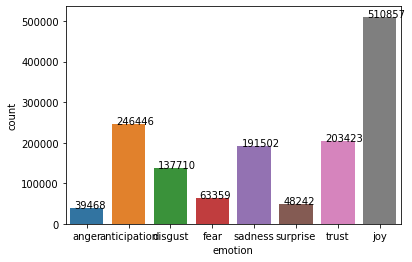

In [54]:
import seaborn as sns
ax = sns.countplot(df_train['emotion'], order=my_tags)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [69]:
df_val

,hashtags,tweet_id,text,identification,emotion
995309,[],0x1f28cc,Listening to @xtina just makes me want to pack...,train,trust
631533,[],0x2a72c1,@POWERATL @iHeartRadio @OnAirWithRyan Please m...,train,sadness
1116306,"[powerwall, Tesla, relief, humanitarian]",0x258ae8,@elonmusk #powerwall in PR with solar tiles de...,train,trust
231371,[],0x2e7bed,Closed Buy 2.1 Lots EURUSD 1.18265 for +13.4 p...,train,joy
1662848,[],0x275aae,#-#G-#Black-#amp-#Clear-#Nice-#Creative-#Desig...,train,trust
...,...,...,...,...,...
419183,[],0x275d93,@pdmcleod What is wrong with spending more on ...,train,anticipation
654425,[],0x20a02f,@HOT97 I Guess <LH> runs in that Family 🤦‍♂️🤦‍♂️,train,surprise
152330,[],0x275169,"If ur <LH> at work, u won't be working effecti...",train,disgust
137628,[],0x279cc0,"Finally feeling happiness again, in my life. ...",train,trust


/home/allenyl/.py_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


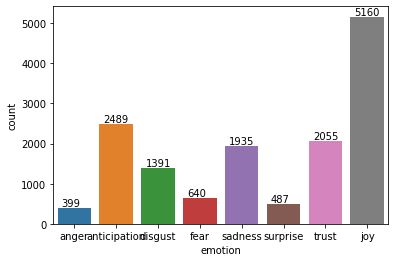

In [53]:
import seaborn as sns
ax = sns.countplot(df_val['emotion'], order=my_tags)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

### Save dataframe for later use

In [38]:
## save to pickle file
df_train.to_pickle("df_train.pkl")
df_val.to_pickle("df_val.pkl")
df_test.to_pickle("df_test.pkl")

### Loading saved dataframe

In [2]:
import pandas as pd

## load a pickle file
df_train = pd.read_pickle("df_train.pkl")
df_val = pd.read_pickle("df_val.pkl")
df_test = pd.read_pickle("df_test.pkl")

In [3]:
df_train

,hashtags,tweet_id,text,identification,emotion
794934,[],0x380be6,Today I got to know about one more fake baba ...,train,sadness
254162,[GamesOfThrones],0x28f153,GAME OF THRONES!!! 🐉 😵😮 #GamesOfThrones <LH>,train,joy
423917,[dream],0x235959,40 Never give up on your #dream. <LH> me to ma...,train,anticipation
783421,[],0x1da39e,@CNNPolitics He could just as well have been t...,train,sadness
1736577,"[gbbo, needaminiroll]",0x205458,I miss Selasi. Also why are there so many adve...,train,anticipation
...,...,...,...,...,...
288532,"[praia, cia]",0x2204f3,Beach ☀🏊😎😍 <LH> #praia <LH> #cia,train,joy
341013,[],0x1efe39,Inspire yourself before you inspire another. <...,train,joy
423159,"[TELLMEYOULOVEME, SORRYNOTSORRY, DADDYISSUES, ...",0x1f97a3,Seriously @ddlovato’s new album is pure 🔥🔥🔥 #T...,train,sadness
1146357,[],0x35036e,"When I wake up before my alarm, I don't allow ...",train,surprise


In [4]:
df_test

,hashtags,tweet_id,text,identification,emotion
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,NaN
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,NaN
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test,NaN
...,...,...,...,...,...
1867525,[],0x2913b4,"""For this is the message that ye heard from th...",test,NaN
1867529,[],0x2a980e,"""There is a lad here, which hath five barley l...",test,NaN
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN


### class balancing by undersampling

In [57]:
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

In [58]:
X_res, y_res = rus.fit_resample(np.array(range(len(df_train))).reshape(-1,1), df_train['emotion'])

In [59]:
df_train_res = df_train.iloc[X_res.reshape(1, -1)[0]]

In [60]:
from collections import Counter

Counter(df_train_res['emotion'])

Counter({'anger': 39468,
         'anticipation': 39468,
         'disgust': 39468,
         'fear': 39468,
         'joy': 39468,
         'sadness': 39468,
         'surprise': 39468,
         'trust': 39468})

In [61]:
len(df_train_res)

315744

/home/allenyl/.py_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='emotion', ylabel='count'>

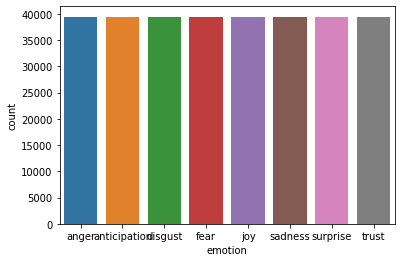

In [62]:
import seaborn as sns
sns.countplot(df_train_res['emotion'])

### extract top 10% emoji

In [78]:
emoji_list = []

for i in df_train_res['text'].iloc[:]:
    emoji_list += emoji.distinct_emoji_list(i)
#     print(emoji.distinct_emoji_list(i))

In [149]:
import pandas as pd
df_emoji_count = pd.DataFrame(emoji_count.most_common(int(len(emoji_count) * 0.1)))

In [55]:
df_emoji_count

['😂',
 '❤️',
 '😭',
 '😍',
 '🇺🇸',
 '🙄',
 '😩',
 '🤔',
 '😡',
 '😊',
 '🇬🇧',
 '🇨🇦',
 '🇷🇺',
 '🇨🇳',
 '🕘',
 '🇪🇺',
 '🙏',
 '❤',
 '😱',
 '🔥',
 '😘',
 '😒',
 '💕',
 '💯',
 '😳',
 '😢',
 '💙',
 '😎',
 '😁',
 '👍',
 '😉',
 '🤣',
 '😔',
 '😤',
 '🙈',
 '😰',
 '👀',
 '🙏🏽',
 '😨',
 '🤗',
 '😬',
 '💜',
 '🙌',
 '✨',
 '😯',
 '😇',
 '🙏🏾',
 '😀',
 '😅',
 '🙃',
 '😜',
 '💖',
 '😦',
 '🙏🏼',
 '🎉',
 '☺️',
 '😑',
 '👌',
 '🎶',
 '😠',
 '🙌🏾',
 '😫',
 '💔',
 '😈',
 '👏',
 '😏',
 '💛',
 '😐',
 '😕',
 '💪',
 '🙏🏻',
 '💚',
 '😞',
 '😃',
 '💋',
 '🤢',
 '🙌🏽',
 '🌈',
 '😌',
 '👻',
 '💗',
 '😷',
 '😣',
 '🙌🏼',
 '😋',
 '💞',
 '😄',
 '😲',
 '😆',
 '💀',
 '♥️',
 '😴',
 '🎃',
 '💩',
 '🙂',
 '😥',
 '😝',
 '💦',
 '🙌🏻',
 '✌',
 '👑',
 '‼️',
 '🦃',
 '🌞',
 '🤦🏽\u200d♀️',
 '☹️',
 '💓',
 '😖',
 '😓',
 '🌎',
 '🌹',
 '😮',
 '👍🏻',
 '💰',
 '😪',
 '☀️',
 '🖤',
 '🤦🏾\u200d♀️',
 '👎',
 '🎄',
 '👊',
 '🙊',
 '☺',
 '🎂',
 '😶',
 '🎤',
 '⚽',
 '🍁',
 '🗣',
 '😵',
 '👅',
 '🏈',
 '🏳️\u200d🌈',
 '💥',
 '🙁',
 '♥',
 '👌🏻',
 '☕',
 '😧',
 '🤤',
 '🎁',
 '💃',
 '🤡',
 '🤓',
 '🐶',
 '💘',
 '🌴',
 '🤦🏻\u200d♀️',
 '👏🏻',
 '\U0001f92c',
 '👏🏼',
 '👌🏼',
 '🌟',
 '🤒',
 '👏🏾',


### Save processed dataset

In [170]:
df_emoji_count.to_pickle("df_emoji_count.pkl")

### Load processed dataset

In [15]:
df_emoji_count = pd.read_pickle("df_emoji_count.pkl")

## Data Preprocessing

In [5]:
from datasets import Dataset, DatasetDict

train_ds = Dataset.from_pandas(df_train)
val_ds = Dataset.from_pandas(df_val)
test_ds = Dataset.from_pandas(df_test)

ds = DatasetDict()

ds['train'] = train_ds
ds['validation'] = val_ds
ds['test'] = test_ds

In [6]:
ds

DatasetDict({
    train: Dataset({
        features: ['hashtags', 'tweet_id', 'text', 'identification', 'emotion', '__index_level_0__'],
        num_rows: 1441007
    })
    validation: Dataset({
        features: ['hashtags', 'tweet_id', 'text', 'identification', 'emotion', '__index_level_0__'],
        num_rows: 14556
    })
    test: Dataset({
        features: ['hashtags', 'tweet_id', 'text', 'identification', 'emotion', '__index_level_0__'],
        num_rows: 411972
    })
})

In [7]:
from datasets import ClassLabel
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
ClassLabels = ClassLabel(num_classes=len(my_tags), names=my_tags)

ClassLabels

ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None)

In [8]:
# Mapping Labels to IDs
def map_emotion2id(batch):
    batch['label'] = [ClassLabels.str2int(label) if label is not None else None for label in batch['emotion']]
    return batch

ds = ds.map(map_emotion2id, batched=True)
ds = ds.cast_column('label', ClassLabels)

Casting the dataset: 100%|██████████| 42/42 [00:01<00:00, 26.29ba/s]


In [9]:
ds['train'].features

{'hashtags': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'tweet_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'identification': Value(dtype='string', id=None),
 'emotion': Value(dtype='string', id=None),
 '__index_level_0__': Value(dtype='int64', id=None),
 'label': ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None)}

In [10]:
ds = ds.remove_columns(["hashtags", "identification", "emotion", "__index_level_0__"])

In [11]:
ds['train'].features

{'tweet_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None)}

In [12]:
ds

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'text', 'label'],
        num_rows: 1441007
    })
    validation: Dataset({
        features: ['tweet_id', 'text', 'label'],
        num_rows: 14556
    })
    test: Dataset({
        features: ['tweet_id', 'text', 'label'],
        num_rows: 411972
    })
})

In [13]:
from itertools import islice

for text,label in islice(zip(ds['train']['text'], ds['train']['label']), 20):
    print(str(label) + '\t' + text)

4	Today I got to know about one more fake baba  And why the hell people killing and who r they killing in rage this time🤔 <LH>
7	GAME OF THRONES!!! 🐉 😵😮 #GamesOfThrones <LH>
1	40 Never give up on your #dream. <LH> me to make your dreams come <LH> <LH> December 01, 2017 at 10:15AM
4	@CNNPolitics He could just as well have been talking about DJT !!#Sad
1	I miss Selasi. Also why are there so many adverts 😩 #gbbo <LH> #needaminiroll
1	<LH> <LH> Proverbs17:16It does a fool no good to spend money on an education, because he has no common sense.
1	#100DaysOfCode ended up with 40 M of news articles with categories . model training ... <LH> to test out the accuracy #MachineLearning 😁
2	Ron Mott just said things in Puerto Rico aren’t that bad but then goes on a 5 minute list of complete misery.   #WTF? #MTP
4	RIP to the NFL. <LH> #stupiddisrespectfulBS
5	It is really <LH> how changing just a single thing or thought process in your #life can #produce immediate returns
1	Hey #Texas <LH> doesn't ex

### Tokenize

In [16]:
from transformers import AutoTokenizer

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

num_added_toks = tokenizer.add_tokens(df_emoji_count[0].tolist())

print('We have added', num_added_toks, 'tokens')

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, max_length=512)

We have added 180 tokens


In [17]:
ds_encoded = ds.map(tokenize, batched=True, batch_size=1000)

100%|██████████| 412/412 [00:08<00:00, 47.09ba/s]


In [18]:
ds_encoded["train"].features

{'tweet_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

In [19]:
ds_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
ds_encoded["train"].features

{'tweet_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

#### show label and length

In [20]:
from itertools import islice

for input_ids,label in islice(zip(ds_encoded['train']['input_ids'], ds_encoded['train']['label']), 20):
    print(str(label), len(input_ids), tokenizer.decode(input_ids) )

tensor(4) 32 [CLS] today i got to know about one more fake baba and why the hell people killing and who r they killing in rage this time 🤔 < lh > [SEP]
tensor(7) 21 [CLS] game of thrones!!! [UNK] 😵 😮 # gamesofthrones < lh > [SEP]
tensor(1) 38 [CLS] 40 never give up on your # dream. < lh > me to make your dreams come < lh > < lh > december 01, 2017 at 10 : 15am [SEP]
tensor(4) 22 [CLS] @ cnnpolitics he could just as well have been talking about djt!! # sad [SEP]
tensor(1) 30 [CLS] i miss selasi. also why are there so many adverts 😩 # gbbo < lh > # needaminiroll [SEP]
tensor(1) 36 [CLS] < lh > < lh > proverbs17 : 16it does a fool no good to spend money on an education, because he has no common sense. [SEP]
tensor(1) 39 [CLS] # 100daysofcode ended up with 40 m of news articles with categories. model training... < lh > to test out the accuracy # machinelearning 😁 [SEP]
tensor(2) 35 [CLS] ron mott just said things in puerto rico aren ’ t that bad but then goes on a 5 minute list of complete

### Save processed dataset

In [21]:
ds_encoded.save_to_disk("ds_encoded.hf")

### Loading processed dataset

In [22]:
from datasets import ClassLabel
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
ClassLabels = ClassLabel(num_classes=len(my_tags), names=my_tags)

ClassLabels

ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None)

In [174]:
from datasets import load_from_disk
  
ds_encoded = load_from_disk("./ds_encoded.hf")

In [175]:
ds_encoded

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 315744
    })
    validation: Dataset({
        features: ['tweet_id', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 14556
    })
    test: Dataset({
        features: ['tweet_id', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 411972
    })
})

### remove unnecssary columns

In [23]:
ds_encoded['train'] = ds_encoded['train'].remove_columns(["tweet_id"])
ds_encoded['validation'] = ds_encoded['validation'].remove_columns(["tweet_id"])

In [24]:
ds_encoded["test"] = ds_encoded["test"].remove_columns(["label"])

## Model Training

In [25]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [26]:
device

device(type='cuda')

In [27]:
from transformers import AutoTokenizer

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

num_added_toks = tokenizer.add_tokens(df_emoji_count[0].tolist())

print('We have added', num_added_toks, 'tokens')

We have added 180 tokens


#### show label and length

In [28]:
from itertools import islice

for input_ids,label in islice(zip(ds_encoded['train']['input_ids'], ds_encoded['train']['label']), 20):
    print(str(label), len(input_ids), tokenizer.decode(input_ids) )

tensor(4) 32 [CLS] today i got to know about one more fake baba and why the hell people killing and who r they killing in rage this time 🤔 < lh > [SEP]
tensor(7) 21 [CLS] game of thrones!!! [UNK] 😵 😮 # gamesofthrones < lh > [SEP]
tensor(1) 38 [CLS] 40 never give up on your # dream. < lh > me to make your dreams come < lh > < lh > december 01, 2017 at 10 : 15am [SEP]
tensor(4) 22 [CLS] @ cnnpolitics he could just as well have been talking about djt!! # sad [SEP]
tensor(1) 30 [CLS] i miss selasi. also why are there so many adverts 😩 # gbbo < lh > # needaminiroll [SEP]
tensor(1) 36 [CLS] < lh > < lh > proverbs17 : 16it does a fool no good to spend money on an education, because he has no common sense. [SEP]
tensor(1) 39 [CLS] # 100daysofcode ended up with 40 m of news articles with categories. model training... < lh > to test out the accuracy # machinelearning 😁 [SEP]
tensor(2) 35 [CLS] ron mott just said things in puerto rico aren ’ t that bad but then goes on a 5 minute list of complete

In [29]:
from transformers import AutoModelForSequenceClassification
num_labels = len(my_tags)
model = (AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels).to(device))

model.resize_token_embeddings(len(tokenizer))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Embedding(30702, 768)

In [30]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [31]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

batch_size = 64
logging_steps = len(ds_encoded["train"]) // batch_size
training_args = TrainingArguments(output_dir="results",
                                  num_train_epochs=8,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1",
                                  weight_decay=0.01,
                                  evaluation_strategy="steps",
                                  save_strategy="steps",
                                  eval_steps=200,
                                  save_steps=1000,
                                  save_total_limit = 5,
                                  group_by_length=True,
                                  gradient_accumulation_steps=1,
                                  disable_tqdm=False)

In [32]:
from transformers import Trainer

data_collocator = DataCollatorWithPadding(tokenizer)

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  data_collator=data_collocator,
                  train_dataset=ds_encoded["train"],
                  eval_dataset=ds_encoded["validation"])
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/home/allenyl/.py_env/lib/python3.6/site-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1441007
  Num Epochs = 8
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 128
  Gradient Accumulation steps = 1
  Total optimization steps = 90064
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were sca

Step,Training Loss,Validation Loss,Accuracy,F1
200,No log,1.454468,0.469222,0.381939
400,No log,1.289015,0.542388,0.508594
600,1.465500,1.206103,0.574196,0.555526
800,1.465500,1.150943,0.593844,0.577241
1000,1.210200,1.136248,0.595218,0.574692
1200,1.210200,1.101854,0.604356,0.594237
1400,1.210200,1.078133,0.611844,0.592399
1600,1.127900,1.071184,0.613630,0.601052
1800,1.127900,1.058015,0.621737,0.606056
2000,1.098600,1.046410,0.624004,0.608819


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torc

  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
The following columns in the evaluation set  don't have a corresponding argument in

The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torc

  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
The following columns in the evaluation set  don't have a corresponding argument in

The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torc

RuntimeError: Caught RuntimeError in replica 0 on device 0.
Original Traceback (most recent call last):
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/parallel_apply.py", line 61, in _worker
    output = module(*input, **kwargs)
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/modules/module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/transformers/models/bert/modeling_bert.py", line 1554, in forward
    return_dict=return_dict,
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/modules/module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/transformers/models/bert/modeling_bert.py", line 1006, in forward
    return_dict=return_dict,
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/modules/module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/transformers/models/bert/modeling_bert.py", line 592, in forward
    output_attentions,
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/modules/module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/transformers/models/bert/modeling_bert.py", line 477, in forward
    past_key_value=self_attn_past_key_value,
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/modules/module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/transformers/models/bert/modeling_bert.py", line 409, in forward
    output_attentions,
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/modules/module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/transformers/models/bert/modeling_bert.py", line 334, in forward
    attention_probs = self.dropout(attention_probs)
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/modules/module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/modules/dropout.py", line 58, in forward
    return F.dropout(input, self.p, self.training, self.inplace)
  File "/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/functional.py", line 1169, in dropout
    return _VF.dropout_(input, p, training) if inplace else _VF.dropout(input, p, training)
RuntimeError: CUDA out of memory. Tried to allocate 66.00 MiB (GPU 0; 10.76 GiB total capacity; 9.24 GiB already allocated; 5.44 MiB free; 9.58 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF


### Save trained model

In [33]:
model.save_pretrained('./model')
tokenizer.save_pretrained('./model')

Configuration saved in ./model/config.json
Model weights saved in ./model/pytorch_model.bin
tokenizer config file saved in ./model/tokenizer_config.json
Special tokens file saved in ./model/special_tokens_map.json


('./model/tokenizer_config.json',
 './model/special_tokens_map.json',
 './model/vocab.txt',
 './model/added_tokens.json',
 './model/tokenizer.json')

### Free GPU memory

In [15]:
del model
del tokenizer

In [16]:
torch.cuda.empty_cache()

In [17]:
torch.cuda.memory_allocated()

0

### Loading Saved model

In [7]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
device

device(type='cuda')

In [9]:
from transformers import AutoModelForSequenceClassification
num_labels = len(my_tags)
model = (AutoModelForSequenceClassification.from_pretrained('./model').to(device))

In [10]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('./model')

In [11]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [12]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

batch_size = 64
logging_steps = len(ds_encoded["train"]) // batch_size
training_args = TrainingArguments(output_dir="results",
                                  num_train_epochs=8,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1",
                                  weight_decay=0.01,
                                  evaluation_strategy="steps",
                                  save_strategy="steps",
                                  eval_steps=100,
                                  save_steps=1000,
                                  save_total_limit = 5,
                                  group_by_length=True,
                                  disable_tqdm=False)

In [13]:
from transformers import Trainer

data_collocator = DataCollatorWithPadding(tokenizer)

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  data_collator=data_collocator,
                  train_dataset=ds_encoded["train"],
                  eval_dataset=ds_encoded["validation"])

## Evaluation

In [34]:
preds_output = trainer.predict(ds_encoded["validation"])
preds_output.metrics

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 14556
  Batch size = 64


{'test_loss': 0.904143214225769,
 'test_accuracy': 0.6740175872492443,
 'test_f1': 0.6672328057243919,
 'test_runtime': 25.7681,
 'test_samples_per_second': 564.885,
 'test_steps_per_second': 4.424}

In [35]:
import numpy as np
from sklearn.metrics import plot_confusion_matrix
y_valid = np.array(ds_encoded["validation"]["label"])
y_preds = np.argmax(preds_output.predictions, axis=1)

[Text(0.5, 15.0, 'Predict'), Text(33.0, 0.5, 'Ground Truth')]

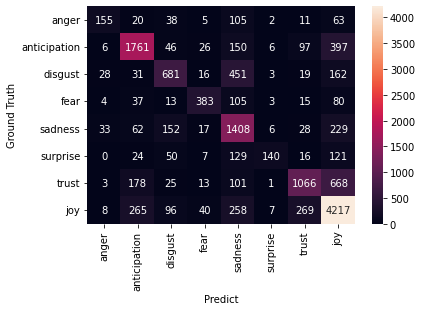

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_preds)
f = sns.heatmap(cm, annot=True, fmt='d', xticklabels=my_tags, yticklabels=my_tags)

# ax = sns.heatmap(glue, annot=True)
f.set(xlabel="Predict", ylabel="Ground Truth")

## Export predicted emotion on test set

In [37]:
test_preds_output = trainer.predict(ds_encoded["test"])

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: tweet_id, text. If tweet_id, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 411972
  Batch size = 64


In [38]:
test_preds_output.predictions

array([[-2.9776716e+00,  4.5113845e+00, -3.2239842e+00, ...,
        -1.8697710e+00,  3.4867823e+00,  3.6677370e+00],
       [-3.2521825e+00,  3.7225811e+00, -2.6806450e+00, ...,
        -2.1308975e+00,  5.1941905e+00,  1.8673040e+00],
       [-2.1162276e+00,  1.6997565e+00, -1.1257968e+00, ...,
        -9.7497791e-01,  1.2540598e+00,  3.6577013e+00],
       ...,
       [ 1.0148422e+00,  3.9296363e-02,  7.5920385e-01, ...,
        -1.1577381e+00, -1.3354285e+00, -2.0914003e-01],
       [-1.4459872e+00,  1.1882880e+00, -1.5164846e+00, ...,
        -6.2600040e-01,  2.6019311e+00,  3.0883329e+00],
       [ 1.4908674e+00, -7.6212716e-01,  4.7965294e-01, ...,
        -2.2046389e-03, -1.8585395e+00, -1.0129337e+00]], dtype=float32)

In [39]:
import numpy as np

test_pred = np.argmax(test_preds_output.predictions, axis=1).tolist()

In [40]:
test_pred_str = [ClassLabels.int2str(label) for label in test_pred]

In [41]:
df_test = ds_encoded["test"].to_pandas()

In [42]:
df_test['emotion_pred'] = test_pred_str

In [43]:
df_test

,tweet_id,text,input_ids,token_type_ids,attention_mask,emotion_pred
0,0x28b412,"Confident of your obedience, I write to you, k...","[101, 9657, 1997, 2115, 22645, 1010, 1045, 433...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",anticipation
1,0x2de201,"""Trust is not the same as faith. A friend is s...","[101, 1000, 3404, 2003, 2025, 1996, 2168, 2004...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",trust
2,0x218443,When do you have enough ? When are you satisfi...,"[101, 2043, 2079, 2017, 2031, 2438, 1029, 2043...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",joy
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #...","[101, 2643, 8271, 2017, 2039, 1010, 2085, 5252...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",anticipation
4,0x26289a,"In these tough times, who do YOU turn to as yo...","[101, 1999, 2122, 7823, 2335, 1010, 2040, 2079...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",trust
...,...,...,...,...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th...","[101, 1000, 2005, 2023, 2003, 1996, 4471, 2008...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",joy
411968,0x2a980e,"""There is a lad here, which hath five barley l...","[101, 1000, 2045, 2003, 1037, 14804, 2182, 101...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",anticipation
411969,0x316b80,When you buy the last 2 tickets remaining for ...,"[101, 2043, 2017, 4965, 1996, 2197, 1016, 9735...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",sadness
411970,0x29d0cb,I swear all this hard work gone pay off one da...,"[101, 1045, 8415, 2035, 2023, 2524, 2147, 2908...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",joy


In [44]:
df_test[['tweet_id', 'emotion_pred']].to_csv('prediction2.csv', index=False, header=['id', 'emotion'])